In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
plot_params = {
    'text.latex.preamble' : r'\usepackage{amsmath}',
    'text.usetex'         : True,
    'font.family'         : 'sans-serif',
    'font.sans-serif'     : ['Helvetica']   
}
plt.rcParams.update(plot_params)

# Problem 1

In [ ]:
kappa = sp.Symbol(r'\kappa',real=True,positive=True)
v0    = sp.Symbol(r'v_0',real=True,positive=True)
a     = sp.Symbol(r'a',real=True,positive=True)
A,B,C,D = sp.symbols(r'A B C D')

mat = sp.Matrix([
    [sp.cosh(kappa*a/sp.S(2)),-sp.sinh(kappa*a/2)],
    [v0,-2*kappa]
])
const = sp.Matrix([A,B])
exprs = mat*const
exprs

In [ ]:
mat.det().simplify()

In [ ]:
x = sp.symbols('x')
sp.cosh(x).diff(x)

In [ ]:
z = sp.symbols('z')
left = sp.tanh(z/2)
left.diff(z).subs(z,0)

In [ ]:
z = np.linspace(0,0.5)
plt.plot(z,np.tanh(z/2))
plt.plot(z,2*z/4)
plt.show()

In [ ]:
k  = sp.Symbol(r'k',real=True,positive=True)
v0 = sp.Symbol(r'v_0',real=True,positive=True)
a  = sp.Symbol(r'a',real=True,positive=True)
A,B,C,D = sp.symbols(r'A B C D')

mat = sp.Matrix([
    [sp.cos(k*a/sp.S(2)),sp.sin(k*a/2)],
    [v0,2*k]
])
const = sp.Matrix([A,B])
exprs = mat*const
exprs

In [ ]:
mat.det().simplify()

In [ ]:
z = sp.symbols('z')
sp.tan(z/2).diff(z).subs(z,0)

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))

temp = np.linspace(0.01,0.99*np.pi,100)
for i in range(5):
    z = temp + i*np.pi
    ax.plot(z,np.tan(z/2),'k',label=r'$\tan(z/2)$' if i == 0 else '')
    ax.plot(z,2*z,'r',label=r'$z_0 = 1$' if i == 0 else '')
    ax.plot(z,2*z/10,'g',label=r'$z_0 = 10$' if i == 0 else '')

ax.legend(fontsize=20,loc='upper left')
ax.set_xlim(0,5*np.pi)
ax.set_ylim(0,35)
ax.set_xlabel(r'$z$',size=30)
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.show()
# fig.savefig('prob1b.pdf',bbox_inches='tight')

# Problem 2

In [ ]:
B,C,D,E = sp.symbols('B C D E')
k,kappa,a = sp.symbols(r'k \kappa a',real=True,positive=True)

In [ ]:
i = sp.I
eq1 = sp.Eq(1 + B,C + D)
eq2 = sp.Eq(i*k*(1-B),kappa*(C-D))
eq3 = sp.Eq(E*sp.exp(i*k*a),C*sp.exp(kappa*a)+D*sp.exp(-kappa*a))
eq4 = sp.Eq(i*k*E*sp.exp(i*k*a),kappa*(C*sp.exp(kappa*a) - D*sp.exp(-kappa*a)))

In [ ]:
sol = sp.solve([eq1,eq2,eq3,eq4],[B,C,D,E])

In [ ]:
B_A = sol[B].simplify().factor()
E_A = sol[E].simplify().factor()

display(B_A)
display(E_A)

In [ ]:
R = (B_A.conjugate()*B_A).expand().simplify()
T = (E_A.conjugate()*E_A).expand().simplify()

display(R)
display(T)
display((R+T).simplify())

In [ ]:
eps = sp.Symbol(r'\epsilon',real=True,positive=True)

expr = 4*kappa**2*k**2/((kappa**2 + k**2)**2*sp.cosh(kappa*a)**2 - (k**2 - kappa**2)**2)
expr.subs(kappa,sp.sqrt(v0-eps)).subs(k,sp.sqrt(eps)).expand().simplify().factor()



In [ ]:
i = sp.I
num = i*kappa*k
den = (k*sp.cosh(kappa*a/2) + i*kappa*sp.sinh(kappa*a/2))*(k*sp.sinh(kappa*a/2) + i*kappa*sp.cosh(kappa*a/2))
num = (num*den.conjugate()).expand().simplify()
re,im = num.as_real_imag()
tan_delta = im/re
display(tan_delta.simplify())
diff = tan_delta.subs(kappa,sp.sqrt(v0-k**2)).diff(k).subs(v0,kappa**2+k**2)
display(diff.expand().simplify().simplify())
# display((1/(1+tan_delta**2)).simplify())
diff *= 1/(1+tan_delta**2)
diff = diff.subs(v0,kappa**2+k**2).expand().simplify()
# diff.expand().simplify()

num,den = sp.fraction(diff)
display(num)#.subs(v0,kappa**2+k**2).subs(eps,k**2).simplify())
display(den.factor())#.subs(v0,kappa**2+k**2).subs(eps,k**2).simplify())

In [ ]:
kap = sp.sqrt(v0-k**2)
display(kap.diff(k).subs(v0,kappa**2+k**2).simplify())

((kap**2 - k**2)/(2*kap*k)).diff(k).simplify().subs(v0,kappa**2+k**2)


# tanh(kappa*a)

((kappa**2 + k**2)**2 - (k**2-kappa**2)).expand().cancel()

In [ ]:
sinh_2x = 2*sp.sinh(x)*sp.cosh(x)
cosh_2x = 2*sp.cosh(x)**2 - 1
sinh_4x = 2*sinh_2x*cosh_2x
cosh_4x = 2*cosh_2x**2 - 1

display(sinh_4x.expand())
display(cosh_4x.expand())

display((cosh_2x**2).expand())

In [ ]:
temp = -4*kappa**3*k**2 + kappa*(k**2+kappa**2)**2
temp.expand().simplify()

In [ ]:
temp = (k**2*sp.cosh(kappa*a)**2 + kappa**2*sp.sinh(kappa*a)**2)*(k**2*sp.sinh(kappa*a)**2 + kappa**2*sp.cosh(kappa*a)**2)
temp.expand().simplify().factor(sp.cosh(4*kappa*a))

In [ ]:
x = sp.symbols(r'x')
sinh2x_2 = (sp.cosh(x) - 1)/sp.S(2)
cosh2x_2 = (sp.cosh(x) + 1)/2

expr = sinh2x_2**2 + cosh2x_2**2
expr.expand().simplify()

In [ ]:
temp = -(kappa**2+k**2)**2 - (kappa**4 - 6*kappa**2*k**2 + k**4)
temp.expand().simplify().factor()

### part 2

In [ ]:
B,C,D,E = sp.symbols('B C D E')
k,K,a = sp.symbols(r'k K a',real=True,positive=True)

In [ ]:
i = sp.I
eq1 = sp.Eq(1 + B,C + D)
eq2 = sp.Eq(k*(1-B),K*(C-D))
eq3 = sp.Eq(E*sp.exp(i*k*a),C*sp.exp(i*K*a)+D*sp.exp(-i*K*a))
eq4 = sp.Eq(k*E*sp.exp(i*k*a),K*(C*sp.exp(i*K*a) - D*sp.exp(-i*K*a)))

In [ ]:
sol = sp.solve([eq1,eq2,eq3,eq4],[B,C,D,E])

In [ ]:
B_A = sol[B].simplify().factor()
E_A = sol[E].simplify().factor()

display(B_A)
display(E_A)

In [ ]:
R = (B_A.conjugate()*B_A).expand().simplify()
T = (E_A.conjugate()*E_A).expand().simplify()

display(R)
display(T)
display((R+T).simplify())

In [ ]:
temp = (K**2*sp.cos(K*a/2)**2 + k**2*sp.sin(K*a/2)**2)*(K**2*sp.sin(K*a/2)**2 + k**2*sp.cos(K*a/2)**2)
temp.expand().simplify()



In [ ]:
(K**4 + k**4 + 2*K**2*k**2).factor()

In [ ]:
(-(K**4 + k**4) + 2*K**2*k**2).simplify().factor()

In [ ]:
x = sp.symbols('x')
sin2x_2 = (1-sp.cos(x))/sp.S(2)
cos2x_2 = (1 + sp.cos(x))/sp.S(2)

(sin2x_2**2 + cos2x_2**2).expand().simplify()

In [ ]:
sp.cosh(i*K*a)

# Problem 3

/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_74725/935568114.py:7: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(z,-z/np.sqrt(z0**2-z**2),'r-',label=r'$-z/\sqrt{z_0^2 - z^2}$' if i == 0 else '')


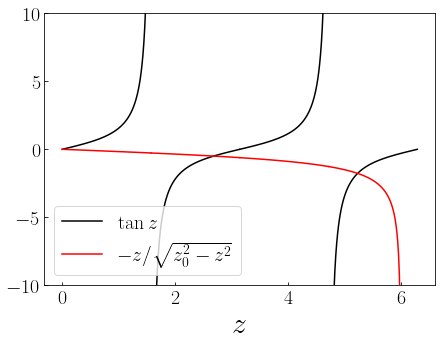

In [69]:
z0 = 6

fig,ax = plt.subplots(figsize=(7,5))
for i in range(int(np.ceil(2*z0/np.pi))):
    z = np.linspace(1.0001*i*np.pi/2,0.9999*(i+1)*np.pi/2,100)
    ax.plot(z,np.tan(z),'k-',label=r'$\tan{z}$' if i == 0 else '')
    ax.plot(z,-z/np.sqrt(z0**2-z**2),'r-',label=r'$-z/\sqrt{z_0^2 - z^2}$' if i == 0 else '')

ax.set_ylim(-10,10)
ax.set_xlabel(r'$z$',size=30)
ax.legend(fontsize=20,loc='lower left')
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.show()
fig.savefig('prob3b.pdf',bbox_inches='tight')

In [ ]:
A,B = sp.symbols('A B')
K,k = sp.symbols('K k',real=True,positive=True)
v0,eps,a = sp.symbols(r'v_0 \epsilon a',real=True,positive=True)

In [ ]:
eq2

In [ ]:
eq1 = sp.Eq(A*sp.sin(K*a),B+1)
eq2 = sp.Eq(K*A*sp.cos(K*a),sp.I*k*(B-1))

sol = sp.solve([eq1,eq2],[A,B])

In [ ]:
# sol[A].cancel()
temp = sol[B].cancel()
re,im = temp.as_real_imag()
tan_2d = -im/re
tan_2d.cancel().simplify().rewrite(sp.tan(K*a)).cancel()

In [ ]:
x = sp.symbols('x',real=True)
tan_d = sp.solve(sp.Eq(2*x/(1-x**2),tan_2d),x)[0]
tan_d

In [ ]:
eps = sp.symbols(r'\epsilon',real=True,positive=True)
temp = tan_d.subs(K,sp.sqrt(v0+k**2)).diff(k).subs(v0,K**2-k**2).subs(sp.tan(K*a)**2+1,sp.sec(K*a)**2)
temp *= 1/(1+tan_d**2)
temp = temp.simplify().subs(sp.tan(K*a),sp.sin(K*a)/sp.cos(K*a)).subs(sp.sec(K*a)**2,1/sp.cos(K*a)**2)
temp.subs(K,sp.sqrt(v0+eps)).subs(k,sp.sqrt(eps)).series(eps,0,2).removeO().simplify()

# xi = sp.symbols(r'\xi',real=True,positive=True)
# temp = temp.subs(K,sp.sqrt(v0+eps)).subs(k,sp.sqrt(eps)).subs(v0,xi*eps)
# temp.series(xi)

# (K**2-k**2).subs(K,sp.sqrt(v0+k**2)).subs(k,sp.sqrt(eps))

In [ ]:
temp = 1/sp.sqrt(eps)/(eps + v0*sp.cos(a*sp.sqrt(v0+eps))**2)*(eps + v0*sp.sin(2*a*sp.sqrt(v0+eps))/2/a/sp.sqrt(v0+eps))
temp.series(eps,0,1/2).removeO().simplify()



In [ ]:
diff = ratio.subs(K,sp.sqrt(v0+k**2)).diff(k).subs(v0,K**2-k**2).cancel().simplify()
diff



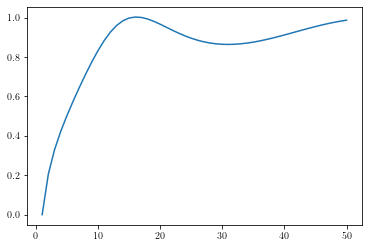

In [2]:
z0 = 5
z = np.linspace(1,50)
K = np.sqrt(z0 + z)
F = (z + z0*np.sin(2*K)/2/K)/(z + z0*np.cos(K)**2)
plt.plot(z,F)
plt.show()

# Problem 4

In [2]:
A,B = sp.symbols(r'A B')
k,a,v0 = sp.symbols(r'k a v_0',real=True,positive=True)

In [3]:
eq1 = sp.Eq(A*sp.sin(k*a),B+1)
eq2 = sp.Eq(sp.I*k*(B-1) - k*A*sp.cos(k*a),v0*(B+1))

In [4]:
sol = sp.solve([eq1,eq2],[A,B])
A_,B_ = sol[A],sol[B]
display(A_.cancel())
B_ = B_.cancel().subs(sp.sin(k*a),sp.tan(k*a)*sp.cos(k*a)).simplify()
display(B_)

-2*I*k/(-I*k*sin(a*k) + k*cos(a*k) + v_0*sin(a*k))

-(I*k*tan(a*k) + k + v_0*tan(a*k))/(-I*k*tan(a*k) + k + v_0*tan(a*k))

In [5]:
R = B_*B_.conjugate()
R

1

In [36]:
temp = A_/(-2*sp.I)
rho = sp.sqrt(1/(A_*A_.conjugate()).cancel())
display(rho)
temp *= temp
re,im = A_.as_real_imag()
tan_phi = -im/re
tan_phi = tan_2phi.subs(sp.sin(k*a),sp.tan(k*a)*sp.cos(k*a)).cancel()
tan_phi

sqrt(k**2*sin(a*k)**2 + k**2*cos(a*k)**2 + 2*k*v_0*sin(a*k)*cos(a*k) + v_0**2*sin(a*k)**2)/(2*k)

(k + v_0*tan(a*k))/(k*tan(a*k))

In [102]:
rho2 = rho**2
x = sp.symbols(r'x',real=True,positive=True)
x0 = sp.symbols(r'x_0',real=True,positive=True)
rho2.subs(k,x/a).subs(v0,x0/a).expand().factor()

(x**2*sin(x)**2 + x**2*cos(x)**2 + 2*x*x_0*sin(x)*cos(x) + x_0**2*sin(x)**2)/(4*x**2)

In [37]:
re,im = B_.as_real_imag()
ratio = -im/re
ratio = ratio.cancel().simplify()
ratio

2*k*(k + v_0*tan(a*k))*tan(a*k)/(k**2*tan(a*k)**2 - k**2 - 2*k*v_0*tan(a*k) - v_0**2*tan(a*k)**2)

In [38]:
x = sp.symbols('x',real=True)
tan_d = sp.solve(2*x/(1-x**2)-ratio,x)[0].cancel()
tan_d

(k + v_0*tan(a*k))/(k*tan(a*k))

In [42]:
delta_diff = tan_d.diff(k)/(1+tan_d**2)
delta_diff = delta_diff.simplify().expand().simplify().subs(sp.cos(k*a)**2,1-sp.sin(k*a)**2)
delta_diff = delta_diff.expand().simplify()#.subs(sp.sin(k*a)**2,(1-sp.cos(2*k*a))/2).factor()
delta_diff.subs(sp.cos(2*k*a),1-2*sp.sin(k*a)**2).cancel()

(-a*k**2 - v_0*sin(a*k)**2)/(k**2 + k*v_0*sin(2*a*k) + v_0**2*sin(a*k)**2)

/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_71595/134527592.py:7: RuntimeWarning: divide by zero encountered in true_divide
  rho2 = 1 + x0/x*np.sin(2*x)+ (x0/x*np.sin(x))**2
/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_71595/134527592.py:7: RuntimeWarning: invalid value encountered in multiply
  rho2 = 1 + x0/x*np.sin(2*x)+ (x0/x*np.sin(x))**2
/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_71595/134527592.py:12: RuntimeWarning: divide by zero encountered in true_divide
  tau = (1/x)*(1 + (x0/x*np.sin(x))**2)/(1 + x0/x*np.sin(2*x)+ (x0/x*np.sin(x))**2)
/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_71595/134527592.py:12: RuntimeWarning: invalid value encountered in multiply
  tau = (1/x)*(1 + (x0/x*np.sin(x))**2)/(1 + x0/x*np.sin(2*x)+ (x0/x*np.sin(x))**2)


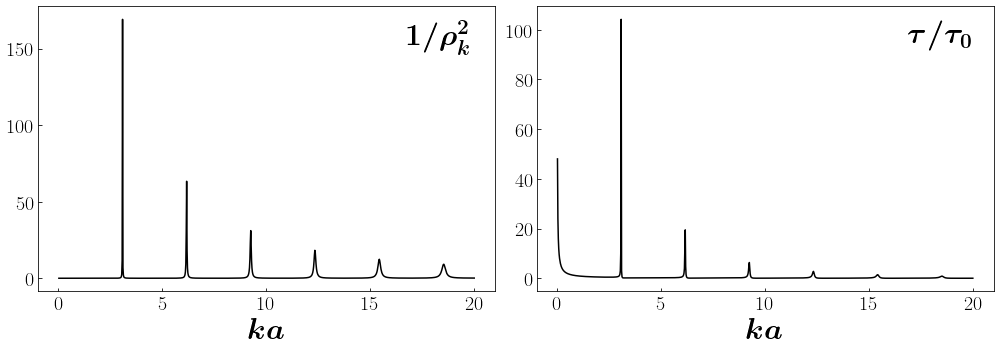

In [112]:
x0 = 50
x = np.linspace(0,20,1000)

nrows,ncols=1,2
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,5*nrows))

rho2 = 1 + x0/x*np.sin(2*x)+ (x0/x*np.sin(x))**2

ax[0].plot(x,1/rho2,'k-')
ax[0].text(x=0.95,y=0.95,s=r'\boldmath $1/\rho_{k}^2$',ha='right',va='top',transform=ax[0].transAxes,size=30)

tau = (1/x)*(1 + (x0/x*np.sin(x))**2)/(1 + x0/x*np.sin(2*x)+ (x0/x*np.sin(x))**2)
ax[1].plot(x,tau,'k-')
ax[1].text(x=0.95,y=0.95,s=r'\boldmath $\tau/\tau_0$',ha='right',va='top',transform=ax[1].transAxes,size=30)

for i in range(ncols):
    ax[i].set_xlabel(r'\boldmath $k a$',size=30)
    ax[i].tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.tight_layout()
plt.show()
# fig.savefig('prob4.pdf',bbox_inches='tight')